### Voting Classifier
  * Suppose you have trained a few classifiers, each one individually achieving about 80% accuracy (Logistic Regression classifier, an SVM classifier, a Random Forest classifier, a K-Nearest Neighbors classifier). We can create a better classifier by **aggregating the predictions** of each classifier **and predict the class that gets the most votes.** This approach is called as Voting Classification.
  
**Hard Voting Classifier : ** Aggregate predections of each classifier and predict the class that gets most votes. This is called as **"majority - voting" or "Hard - voting"** classifier.

  <img src='../img/hard_voting.png' />
 
**Soft Voting Classifier : ** In an ensemble model, all classifiers (algorithms) are able to estimate class probabilities (i.e., they all have predict_proba() method), then we can specify Scikit-Learn to predict the class with the highest probability, averaged over all the individual classifiers. 

<table>
    <tr>
        <th> Modle Name </th>
        <th> Class - 1 Probability</th>
        <th> Class - 0 Probability</th>
    </tr>   
    <tr>
        <td> Model - 1 </td>
        <td> 0.49 </td>
        <td> 0.51 </td>
    </tr>   
    <tr>
        <td> Model - 2 </td>
        <td> 0.99 </td>
        <td> 0.01 </td>
    </tr>  
    <tr>
        <td> Model - 3 </td>
        <td> 0.49 </td>
        <td> 0.51 </td>
    </tr>    
    <tr>
        <td> <b>Averages</b> </td>
        <td> <b> <font color="green">0.66</font></b> </td>
        <td> <b> <font color="red">0.34</font></b> </td>
    </tr>   
</table>
This soft-voting classifier often work better than hard-voting as it gives more weight to highly confident votes. Need to specify **voting="soft"** and ensure that all classifiers can estimate class probabilities.
  * One algorithm where we need to be careful is SVC, by default SVC will not give probabilities, we have to specify "probability" hyperparameter to True.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')

import random
random.seed(10)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Hard Voting

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

hard_voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')
hard_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [4]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
            
hvc_predict = hard_voting_clf.predict(X_test)            
print("Hard voting clasifier accuracy: ", accuracy_score(y_test, hvc_predict))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
Hard voting clasifier accuracy:  0.912


### Soft Voting

In [5]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

soft_voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
soft_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [6]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, soft_voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92


## Bagging and Pasting:
  * In Bagging or Pasting ensemble model use same training algorithm, but train them on different random sub-sets of the training set.
  * **Bagging : ** When **sampling** is performed **with replacement**, we call it as **Bagging**.
  * **Pasting : ** When **sampling** is performed **without replacement**, we call it as **Pasting**.
  <table>  
    <tr>
        <td> <img src="../img/bagging.bmp" alt="Bagging" style="width: 500px;"/> </td>
        <td> <img src="../img/pasting.bmp" alt="Pasting" style="width: 500px;"/> </td>
    </tr>
   </table> 
  * Once all predictors are trained, the ensemble can make a **prediction for a new instance** by simply aggregating the predictions of all predictors. The aggregation function is typically the statistical mode (i.e., the most frequent prediction, **just like a hard voting classifier**) for classification, or **the average for regression.**
  * **Bagging and Pasting are scalable :** Predictors can all be trained in parallel, via different CPU cores or even different servers. Similarly, predictions can be made in parallel. This is one of the reasons why bagging and pasting are such popular methods, they scale very well.

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=False, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.912


In [9]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [10]:
lr_bag_clf = BaggingClassifier(
    LogisticRegression(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
lr_bag_clf.fit(X_train, y_train)
lr_y_pred = lr_bag_clf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, lr_y_pred))

0.84


### Out-of-Bag Evaluation
  * **Out-of-Bag instaces : ** With Bagging, the sampling technique is Bootstraping. This sampling is done with replacement. This means, some instances are sampled many times and some are not at all sampled. Suppore about 63% of the data is sampled for each predictor, remaining 37% is called as **Out-of_Bag samples** for the predictor. Similary for all predictors in Bagging model, there will be out-of-bag samples.
  * We can use these out-of-bag samples (a **separate** unseen dataset for **each predictor**) as cross-validation set.
  * We can do this in Scikit-Learn BaggingClassifier using, oob_score (out-of-bag score) hyperparameter.

In [12]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9013333333333333

##### oob_decision_function_ is returning calss probabilities as the base esitmator (DecisionTree) has got predict_proba() method.

In [13]:
bag_clf.oob_decision_function_[:5, :]

array([[0.31746032, 0.68253968],
       [0.34117647, 0.65882353],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [14]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

### Random Forest
  * Random Forest is an ensemble model of DecisionTrees. Random Forest picks up a sub-set of features  randomly and searches for best feature amoung the sub-set.
  * With a few exceptions, a RandomForestClassifier has all the hyperparameters of a DecisionTreeClassifier (to control how trees are grown), plus all the hyperparameters of a BaggingClassifier to control the ensemble itself.

In [15]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)  

y_pred_rf = rnd_clf.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

### Feature Importance
  * if you look at a single Decision Tree, important features are likely to appear closer to the root of the tree, while unimportant features will often appear closer to the leaves (or not at all). It is therefore possible to get an estimate of a feature’s importance by computing the average depth at which it appears across all trees in the forest. Scikit-Learn computes this automatically for every feature after training. You can access the result using the feature\_importances\_ variable.

In [17]:
digit_dataset = pd.read_csv('../Data/digit_recognizer_train.csv')
digit_X = digit_dataset.iloc[:, 1:]
digit_y = digit_dataset['label']
digit_X_train, digit_X_test, digit_y_train, digit_y_test = \
                                    train_test_split(digit_X, digit_y, test_size=0.2)

In [18]:
rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(digit_X_train, digit_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [19]:
rnd_clf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.47398142e-07, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.91867187e-06,
       5.49643294e-06, 2.54335439e-06, 2.52758119e-06, 3.39500928e-06,
       2.35267345e-06, 1.21392748e-06, 1.21886346e-06, 2.46435557e-06,
       1.18632348e-06, 1.08274058e-06, 1.12574693e-06, 0.00000000e+00,
       0.00000000e+00, 1.58554634e-06, 2.60396527e-06, 4.51070792e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [20]:
for feature, imp_score in sorted(zip(digit_dataset.columns, \
                                    rnd_clf.feature_importances_), key=lambda x: x[1], reverse=True):
    if(imp_score > 0.0001):
        print(feature, imp_score)

pixel377 0.011365319400624263
pixel404 0.008914499267599685
pixel460 0.007826359153579862
pixel349 0.007668242675031955
pixel408 0.007617374107823399
pixel459 0.007440681060753752
pixel154 0.0073724626050181985
pixel405 0.007368438626747965
pixel432 0.0073526625664400505
pixel488 0.007124255128665397
pixel487 0.00670266810751228
pixel374 0.006574432608726678
pixel461 0.006449951179303208
pixel433 0.006307950015501611
pixel317 0.006294627164517706
pixel513 0.006143267528901684
pixel436 0.00601666916154536
pixel542 0.005964578318726067
pixel345 0.005875211426240128
pixel656 0.005747849007097036
pixel380 0.00573554421183375
pixel372 0.005730397173686793
pixel318 0.005726906476294365
pixel350 0.0057113901171710335
pixel346 0.005706259262246644
pixel655 0.005639635842353083
pixel486 0.005626129773372487
pixel209 0.005580251527795898
pixel290 0.005475359493461381
pixel376 0.005463562980888557
pixel373 0.005459345584504399
pixel289 0.005434448947141393
pixel210 0.005397421689932275
pixel321 0

In [21]:
digit_y_pred = rnd_clf.predict(digit_X_train)

In [22]:
from sklearn.metrics import f1_score
print(f1_score(digit_y_train, digit_y_pred, average="weighted"))

1.0


In [23]:
digit_y_test_pred = rnd_clf.predict(digit_X_test)
print(f1_score(digit_y_test, digit_y_test_pred, average="weighted"))

0.9625811123837701


### How and RandomFoest will solve Overfitting issue in DecisionTree

  <table>  
    <tr>
        <td> <img src="../img/decision_tree_over_fitting.PNG" alt="DecisionTree - Overfitted" style="width: 500px;"/> </td>
        <td> <img src="../img/random_forest_fix_overfit.PNG" alt="RandomForest - no Overfitting" style="width: 500px;"/> </td>
    </tr>
   </table> 

## Boosting
  * Boosting (originally called hypothesis boosting) refers to any Ensemble method that can combine several weak learners into a strong learner. **The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor**. There are many boosting methods available, but by far the most popular are **AdaBoost** (short for Adaptive Boosting) and **Gradient Boosting**. Let’s start with AdaBoost.
  
### AdaBoost:
  * AdaBoost is a popular boosting technique which helps you combine multiple “weak classifiers” (sequentially) into a single “strong classifier”. A weak classifier is simply a classifier that performs poorly, but performs better than random guessing.
  * AdaBoost can be applied to any classification algorithm, so it’s really a technique that builds on top of other classifiers.
  * You could just train a bunch of weak classifiers on your own and combine the results, so what does AdaBoost do for you? There’s really two things it figures out for you:
    * **1) Training set Selection : ** It helps you choose the training set for each new classifier that you train based on the results of the previous classifier.
    <img src="../img/ada_boosting_example1.png" alt="Bagging" style="width: 500px;"/> 
    * **2) Classifier Output Weights : **After each classifier is trained, the classifier’s weight is calculated based on its accuracy. More accurate classifiers are given more weight. A classifier with **50% accuracy is given a weight of zero**, and a classifier with **less than 50% accuracy is given negative weight**.
    <img src="../img/ada_boosting_example2.png" alt="Pasting" style="width: 700px;"/>
    
  #### Step 1:   
    * Each instance weight - $w^{(i)}$ is initially set to 1/m. Build model 1.
    * First predictor's weight $\alpha_1$ the classifier is calculated using below formula.
    $$ \alpha_1 = \eta \space log \frac{1 - r_1}{r_1}  $$ 
      * eta ($\eta$) is the learning rate hyperparameter.
      * $r_1 = \frac { {\sum_{i=1}^m w^{(i)}}_{ \hat{y}_{1}^{(i)} \not{=} y^{(i)}} } {\sum_{i=1}^m w^{(i)}}$
      
  #### Step 2:
    * Each instance weight - $w^{(i)}$ is calculated using below formulas.
$$ w^{(i)} = w^{(i)} \space \space if \space \space \hat{y}_{1}^{(i)} = y^{(i)} $$
$$ w^{(i)} = w^{(i)} \space \exp{(\alpha_1)} \space \space if \space \space \hat{y}_{1}^{(i)} \not{=} y^{(i)} $$
    
    * Once new instance weights are ready, the second classification model is build and predictions are made ($ \hat{y_2}^{(i)}$). Using these predictions $ r_2$ , and further $ \alpha_2 $ - the weight for second classifier is calculated.
    
$$ \alpha_2 = \eta \space log \frac{1 - r_2}{r_2} $$
$$ r_2 = \frac { {\sum_{i=1}^m w^{(i)}}_{ \hat{y}_{2}^{(i)} \not{=} y^{(i)}} } {\sum_{i=1}^m w^{(i)}} $$
    
  #### Step 3, 4, ... : Step 2 is repeated until desired number of predictors are reached or perfect predictor is found.
  

### Scikit-Learn uses multiclass version of Ada Boost - SAMME (Stagewise Additive Modeling using a Multiclass Exponential loss function). When there are just two classes, SAMME is equivalent to AdaBoost. Moreover, if the predictors can estimate class probabilities, Scikit-Learn can use a variant of SAMME called SAMME.R (R - stants for real), which relies on class probabilities rather than predictions.

  * AdaBoosting works with Regression or Classification tasks.
  * https://www.youtube.com/watch?v=ix6IvwbVpw0


#### The Following code trains an AdaBoost classifier based on 500 Decision Stumps (A decision stump is a machine learning model consisting of a one-level decision tree)

In [24]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=2), n_estimators=500,
        algorithm="SAMME.R", learning_rate=0.5, random_state=42
    )
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [25]:
from sklearn.metrics import accuracy_score
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.88

### Gradient Boosting
  * Just like AdaBoost, Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. However, **instead of tweaking the instance weights** at every iteration like AdaBoost does, **this method tries to fit the new predictor to the residual errors made by the previous predictor.** The final prediction is going to be the sum of all predictions. 
  * Gradient Boosting works with Regression or Classification tasks (It works great with Regression tasks).
  * When we build Gradient Boosting model using DecisionTreeRegressor we call it as **Gradient Tree Boosting**, or **Gradient Boosted Regression Trees (GBRT)**.
  
#### Step - 1
<img src="../img/gredient_boosting_step1.PNG" alt="Gradient Boosting" style="width: 500px;"/> 

#### Step - 2
<img src="../img/gredient_boosting_step2.PNG" alt="Gradient Boosting" style="width: 500px;"/> 

#### Step - 3
<img src="../img/gredient_boosting_step3.PNG" alt="Gradient Boosting" style="width: 500px;"/> 

#### Step - 4
<img src="../img/gredient_boosting_step4.PNG" alt="Gradient Boosting" style="width: 500px;"/> 

#### .....

#### .....

#### Step - n

#### Final Step 
<img src="../img/gredient_boosting.PNG" alt="Gradient Boosting" style="width: 500px;"/> 

#### GradientBoostingRegressor 
  * A simpler way to train GBRT ensembles is to use Scikit-Learn’s GradientBoostingRegressor class. Much like the RandomForestRegressor class, it has hyperparameters to control the growth of Decision Trees (e.g., max_depth, min_samples_leaf, and so on), as well as hyperparameters to control the ensemble training, such as the number of trees (n_estimators).
  * The **learning_rate** hyperparameter scales the contribution of each tree. If you set it to a low value, such as 0.1, you will need more trees in the ensemble to fit the training set, but the predictions will usually generalize better. This is a regularization technique called shrinkage.

In [26]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, \
                                      learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=200, \
                                 learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", \
                                                 data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

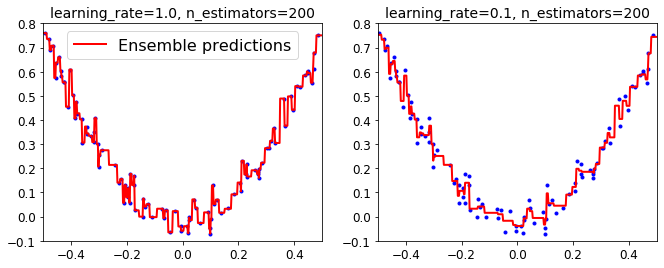

In [30]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".\
                            format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, \
                                                    gbrt_slow.n_estimators), fontsize=14)

plt.show()